# Assignment 5 - Kaggle Competition and Unsupervised Learning

## *Sydney Donati-Leach*
Netid: sd464

*Names of students you worked with on this assignment*: LIST HERE IF APPLICABLE (delete if not)

Note: this assignment falls under collaboration Mode 2: Individual Assignment – Collaboration Permitted. Please refer to the syllabus for additional information.

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), and is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

Total points in the assignment add up to 90; an additional 10 points are allocated to presentation quality.

# Learning objectives
Through completing this assignment you will be able to...
1. Apply the full supervised machine learning pipeline of preprocessing, model selection, model performance evaluation and comparison, and model application to a real-world scale dataset
2. Apply clustering techniques to a variety of datasets with diverse distributional properties, gaining an understanding of their strengths and weaknesses and how to tune model parameters
3. Apply PCA and t-SNE for performing dimensionality reduction and data visualization

In [40]:
# import packages
import sys
import os
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore"
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
plt.rcParams["font.family"] = "serif"
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import auc, roc_curve, accuracy_score, roc_auc_score, \
    precision_recall_curve, average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

# 1

## [40 points] Kaggle Classification Competition

You've learned a great deal about supervised learning and now it's time to bring together all that you've learned. You will be competing in a Kaggle Competition along with the rest of the class! Your goal is to predict hotel reservation cancellations based on a number of potentially related factors such as lead time on the booking, time of year, type of room, special requests made, number of children, etc. While you will be asked to take certain steps along the way to your submission, you're encouraged to try creative solutions to this problem and your choices are wide open for you to make your decisions on how to best make the predictions.

### IMPORTANT: Follow the link posted on Ed to register for the competition
You can view the public leaderboard anytime [here](https://www.kaggle.com/c/ids705-a5-2022/leaderboard)

**The Data**. The dataset is provided as `a5_q1.pkl` which is a pickle file format, which allows you to load the data directly using the code below; the data can be downloaded from the [Kaggle competition website](https://www.kaggle.com/c/ids705-a5-2022/data). A data dictionary for the project can be found [here](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-11/readme.md) and the original paper that describes the dataset can be found [here](https://www.sciencedirect.com/science/article/pii/S2352340918315191). When you load the data, 5 matrices are provided `X_train_original`, `y_train`, and `X_test_original`, which are the original, unprocessed features and labels for the training set and the test features (the test labels are not provided - that's what you're predicting). Additionally, `X_train_ohe` and `X_test_ohe` are provided which are one-hot-encoded (OHE) versions of the data. The OHE versions OHE processed every categorical variable. This is provided for convenience if you find it helpful, but you're welcome to reprocess the original data other ways if your prefer.

**Scoring**. You will need to achieve a minimum acceptable level of performance to demonstrate proficiency with using these supervised learning techniques. Beyond that, it's an open competition and scoring in the top three places of the *private leaderboard* will result in **5 bonus points in this assignment** (and the pride of the class!). Note: the Kaggle leaderboard has a public and private component. The public component is viewable throughout the competition, but the private leaderboard is revealed at the end. When you make a submission, you immediately see your submission on the public leaderboard, but that only represents scoring on a fraction of the total collection of test data, the rest remains hidden until the end of the competition to prevent overfitting to the test data through repeated submissions. You will be be allowed to hand-select two eligible submissions for private score, or by default your best two public scoring submissions will be selected for private scoring.


### Requirements:

**(a) Explore your data.** Review and understand your data. Look at it; read up on what the features represent; think through the application domain; visualize statistics from the paper data to understand any key relationships. **There is no output required for this question**, but you are encouraged to explore the data personally before going further.

**(b) Preprocess your data.** Preprocess your data so it's ready for use for classification and describe what you did and why you did it. Preprocessing may include: normalizing data, handling missing or erroneous values, separating out a validation dataset, preparing categorical variables through one-hot-encoding, etc. To make one step in this process easier, you're provided with a one-hot-encoded version of the data already. 
- Comment on each type of preprocessing that you apply and both how and why you apply it.

**(c) Select, train, and compare models.** Fit at least 5 models to the data. Some of these can be experiments with different hyperparameter-tuned versions of the same model, although all 5 should not be the same type of model. There are no constraints on the types of models, but you're encouraged to explore examples we've discussed in class including:

1. Logistic regression
2. K-nearest neighbors
3. Random Forests
4. Neural networks
5. Support Vector Machines
6. Ensembles of models (e.g. model bagging, boosting, or stacking). `Scikit-learn` offers a number of tools for assisting with this including those for [bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier), [boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html), and [stacking](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html). You're also welcome to explore options beyond the `sklean` universe; for example, some of you may have heard of [XGBoost](https://github.com/dmlc/xgboost) which is a very fast implementation of gradient boosted decision trees that also allows for parallelization. 

When selecting models, be aware that some models may take far longer than others to train. Monitor your output and plan your time accordingly. 

Assess the classification performance AND computational efficiency of the models you selected:
- Plot the ROC curves and PR curves for your models in two plots: one of ROC curves and one of PR curves. For each of these two plots, compare the performance of the models you selected above and trained on the training data, evaluating them on the validation data. Be sure to plot the line representing random guessing on each plot. One of these models should also be your BEST performing submission on the Kaggle public leaderboard (see below). In the legends of each, include the area under the curve for each model (limit to 3 significant figures). For the ROC curve, this is the AUC; for the PR curve, this is the average precision (AP).
- As you train and validate each model time how long it takes to train and validate in each case and create a plot that shows both the training and prediction time for each model included in the ROC and PR curves.
- Describe: 
  - Your process of model selection and hyperparameter tuning
  - Which model performed best and your process for identifying/selecting it

**(d) Apply your model "in practice".** Make *at least* 5 submissions of different model results to the competition (more submissions are encouraged and you can submit up to 10 per day!). These do not need to be the same that you report on above, but you should select your *most competitive* models.
- Produce submissions by applying your model on the test data.
- Be sure to RETRAIN YOUR MODEL ON ALL LABELED TRAINING AND VALIDATION DATA before making your predictions on the test data for submission. This will help to maximize your performance on the test data.
- In order to get full credit on this problem you must achieve an AUC on the Kaggle public leaderboard above the "Benchmark" score on the public leaderboard.

### Guidance:
1. **Preprocessing**. You may need to preprocess the data for some of these models to perform well (scaling inputs or reducing dimensionality). Some of this preprocessing may differ from model to model to achieve the best performance. A helpful tool for creating such preprocessing and model fitting pipelines is the sklearn `pipeline` module which lets you group a series of processing steps together.
2. **Hyperparameters**. Hyperparameters may need to be tuned for some of the models you use. You may want to perform hyperparameter tuning for some of the models. If you experiment with different hyperparameters that include many model runs, you may want to apply them to a small subsample of your overall data before running it on the larger training set to be time efficient (if you do, just make sure to ensure your selected subset is representative of the rest of your data).
3. **Validation data**. You're encouraged to create your own validation dataset for comparing model performance; without this, there's a significant likelihood of overfitting to the data. A common choice of the split is 80% training, 20% validation. Before you make your final predictions on the test data, be sure to retrain your model on the entire dataset.
4. **Training time**. This is a larger dataset than you've worked with previously in this class, so training times may be higher that what you've experienced in the past. Plan ahead and get your model pipeline working early so you can experiment with the models you use for this problem and have time to let them run. 

### Starter code
Below is some code for (1) loading the data and (2) once you have predictions in the form of confidence scores for those classifiers, to produce submission files for Kaggle.

In [80]:
import pandas as pd
import numpy as np
import pickle
import _pickle as cPickle

################################
# Load the data
################################
data = pickle.load(open("/mnt/c/Users/sdona/Documents/Duke/22Spring/705IDS"
"/Assignments/05Assignment/ids705-a5-2022/a5_q1.pkl", "rb" ))

y_train = data['y_train']
X_train_original = data['X_train'] # Original dataset
X_train_ohe = data['X_train_ohe']  # One-hot-encoded dataset

X_test_original = data['X_test']
X_test_ohe = data['X_test_ohe']

################################
# Produce submission
################################

def create_submission(confidence_scores, save_path):
    '''Creates an output file of submissions for Kaggle
    
    Parameters
    ----------
    confidence_scores : list or numpy array
        Confidence scores (from predict_proba methods from classifiers) or
        binary predictions (only recommended in cases when predict_proba is 
        not available)
    save_path : string
        File path for where to save the submission file.
    
    Example:
    create_submission(my_confidence_scores, './data/submission.csv')

    '''
    submission = pd.DataFrame({"score":confidence_scores})
    submission.to_csv(save_path, index_label="id")

**(a) Explore your data.** Review and understand your data. Look at it; read up on what the features represent; think through the application domain; visualize statistics from the paper data to understand any key relationships. **There is no output required for this question**, but you are encouraged to explore the data personally before going further.

**ANSWER**

In [5]:
y_train.value_counts()

0    60123
1    35389
Name: is_canceled, dtype: int64

The labels are unbalanced

In [6]:
print("There are {} null values in the original dataset."
    .format(X_train_original.isna().sum().sum())
)

print("There are {} null values in the one-hot-encoded dataset."
    .format(X_train_ohe.isna().sum().sum())
)

There are 103537 null values in the original dataset.
There are 2 null values in the one-hot-encoded dataset.


In [7]:
X_train_original.isnull().sum()

hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              2
babies                                0
meal                                  0
country                             395
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             13081
company                           90059
days_in_waiting_list                  0


The agent and company being null means that the booking was not made through an agency and/or the company for the agent is unknown.

In [8]:
print("Mean lead time for cancelled bookings: {:.2f} days"
    .format(X_train_original.lead_time[y_train ==1].value_counts().mean())
    )
print("Mean lead time for non-cancelled bookings: {:.2f} days"
    .format(X_train_original.lead_time[y_train ==0].value_counts().mean())
    )

Mean lead time for cancelled bookings: 76.93 days
Mean lead time for non-cancelled bookings: 143.15 days


Bookings that aren't cancelled have longer lead time beforehand than cancelled bookings.

In [9]:
X_train_original["gt_avg_lead_time"] = 0
X_train_original.loc[X_train_original["lead_time"] > X_train_original["lead_time"].\
    mean(), "gt_avg_lead_time"] = 1

In [10]:
X_train_original.hotel[y_train ==1].value_counts()

City Hotel      26448
Resort Hotel     8941
Name: hotel, dtype: int64

In [11]:
X_train_original.hotel[y_train ==0].value_counts()

City Hotel      36994
Resort Hotel    23129
Name: hotel, dtype: int64

In [12]:
X_train_original["city_hotel"] = np.where(X_train_original.hotel == 'City Hotel', 1, 0)
X_train_original["resort_hotel"] = np.where(X_train_original.hotel == 'Resort Hotel', 1,\
     0)

In [13]:
X_train_original.arrival_date_month[y_train ==1].value_counts()

August       4126
July         3807
May          3767
June         3629
April        3624
October      3417
September    3289
March        2533
February     2179
December     1892
November     1703
January      1423
Name: arrival_date_month, dtype: int64

In [14]:
X_train_original.drop(columns=["agent","company","hotel"], axis=1, inplace=True)

**(b) Preprocess your data.** Preprocess your data so it's ready for use for classification and describe what you did and why you did it. Preprocessing may include: normalizing data, handling missing or erroneous values, separating out a validation dataset, preparing categorical variables through one-hot-encoding, etc. To make one step in this process easier, you're provided with a one-hot-encoded version of the data already. 
- Comment on each type of preprocessing that you apply and both how and why you apply it.

**ANSWER**

In [15]:
# X_train_ohe_ = X_train_ohe[selected_features]

In [16]:
X_train_ohe.fillna(0, inplace=True)

Always normalize data before doing dimensionality reduction.

In [17]:
standard_scaler = StandardScaler()
X_train_new = standard_scaler.fit_transform(X_train_ohe)

I will use 500 components for PCA because it cuts the number of features in half.

In [18]:
X_train_pca = PCA(n_components= 500, random_state=0).fit_transform(
    X_train_new, y_train)

Since we have 24,734 more zeros in our labeled data than ones, we should resample our data to make it more balanced.

In [19]:
sm = SMOTE()
X_res, y_res = sm.fit_resample(X_train_pca, y_train)

In [20]:
print("Before resampling, we had {} observations in our data.".format(len(y_train)))
print("After resampling, we have {} observations in our data.".format(len(y_res)))

Before resampling, we had 95512 observations in our data.
After resampling, we have 120246 observations in our data.


Resampling has created 24,734 more observations and now we have perfectly balanced labeled data.

In [21]:
y_res.value_counts()

0    60123
1    60123
Name: is_canceled, dtype: int64

Finally, we need to split our data into 80% training and 20% validation.

In [22]:
X_train_2, X_val, y_train_2, y_val = train_test_split(X_res, y_res, test_size=0.2,\
     random_state=42, stratify=y_res)

**(c) Select, train, and compare models.** Fit at least 5 models to the data. Some of these can be experiments with different hyperparameter-tuned versions of the same model, although all 5 should not be the same type of model. There are no constraints on the types of models, but you're encouraged to explore examples we've discussed in class including:

1. Logistic regression
2. K-nearest neighbors
3. Random Forests
4. Neural networks
5. Support Vector Machines
6. Ensembles of models (e.g. model bagging, boosting, or stacking). `Scikit-learn` offers a number of tools for assisting with this including those for [bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier), [boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html), and [stacking](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html). You're also welcome to explore options beyond the `sklean` universe; for example, some of you may have heard of [XGBoost](https://github.com/dmlc/xgboost) which is a very fast implementation of gradient boosted decision trees that also allows for parallelization. 

When selecting models, be aware that some models may take far longer than others to train. Monitor your output and plan your time accordingly. 

Logistic Regression:

In [23]:
# fit the model and time it
start=time.time()

lr = linear_model.LogisticRegression(solver="liblinear", penalty="l1"
    , C=10**-2).fit(
    X_train_2, y_train_2)

lr_train_time=start-time.time()

In [24]:
# predict the probabilities of the validation set and time it
start=time.time()

lr_pred_proba = lr.predict_proba(X_val)[:,1]

lr_pred_time=start-time.time()

In [27]:
# predict the labels and print the accuracy
y_train_pred = lr.predict(X_train_2)
y_val_pred = lr.predict(X_val)
print("Logistic Regression training accuracy: {:.5}%".format(accuracy_score(y_train_pred,\
    y_train_2)*100))
print("Logistic Regression validation accuracy: {:.5}%".format(accuracy_score(y_val_pred,\
    y_val)*100))

Logistic Regression training accuracy: 79.065%
Logistic Regression validation accuracy: 78.657%


In [ ]:
with open(r"lr.pickle", "wb") as output_file:
    cPickle.dump(lr, output_file)

In [ ]:
with open(r"lr.pickle", "rb") as input_file:
    lr = cPickle.load(input_file)

K-nearest neighbors:

In [28]:
# fit the model and time it
start=time.time()

knn = KNeighborsClassifier(n_neighbors=7).fit(X_train_2, y_train_2)

knn_train_time=start-time.time()

In [29]:
# predict the probabilities of the validation set and time it
start=time.time()

knn_pred_proba = knn.predict_proba(X_val)[:,1]

knn_pred_time=start-time.time()

In [31]:
# predict the labels and print the accuracy
y_train_pred = knn.predict(X_train_2)
y_val_pred = knn.predict(X_val)
print("K-nearest neighbors training accuracy: {:.5}%".format(accuracy_score(y_train_pred,\
    y_train_2)*100))
print("K-nearest neighbors validation accuracy: {:.5}%".format(accuracy_score(y_val_pred,\
    y_val)*100))

K-nearest neighbors training accuracy: 86.846%
K-nearest neighbors validation accuracy: 82.137%


In [ ]:
with open(r"knn.pickle", "wb") as output_file:
    cPickle.dump(knn, output_file)

In [ ]:
with open(r"knn.pickle", "rb") as input_file:
    knn = cPickle.load(input_file)

Random Forest:

In [32]:
# fit the model and time it
start=time.time()

rf = RandomForestClassifier(n_estimators=250, max_depth = 50, criterion="entropy", \
    random_state=42)
rf.fit(X_train_2, y_train_2)

rf_train_time=start-time.time()

In [33]:
# predict the probabilities of the validation set and time it
start=time.time()

rf_pred_proba = rf.predict_proba(X_val)[:,1]

rf_pred_time=start-time.time()

In [34]:
# predict the labels and print the accuracy
y_train_pred = rf.predict(X_train_2)
y_val_pred = rf.predict(X_val)
print("Random Forest training accuracy: {:.5}%".format(accuracy_score(y_train_pred, \
    y_train_2)*100))
print("Random Forest validation accuracy: {:.5}%".format(accuracy_score(y_val_pred, y_val\
    )*100))

Random Forest training accuracy: 99.702%
Random Forest validation accuracy: 90.287%


In [55]:
# feat_dict = dict(zip(rf.feature_names_in_, rf.feature_importances_))
# selected_features = list(dict(sorted(feat_dict.items(), key=lambda item: item[1], reverse=True)[:500]).keys())

In [74]:
with open(r"rf.pickle", "wb") as output_file:
    cPickle.dump(rf, output_file)

In [ ]:
with open(r"rf.pickle", "rb") as input_file:
    rf = cPickle.load(input_file)

Neural Network:

In [35]:
# fit the model and time it
start=time.time()

mlp = MLPClassifier(
    max_iter=300,
    learning_rate_init=0.01,
    hidden_layer_sizes=(5, 5),
    solver="sgd",
    activation="logistic",
    batch_size=1,
    tol=1e-10,
    early_stopping=False,
    n_iter_no_change=300,
    random_state=123,
    warm_start=True,
).fit(X_train_2, y_train_2)

mlp_train_time=start-time.time()

In [36]:
# predict the probabilities of the validation set and time it
start=time.time()

mlp_pred_proba = mlp.predict_proba(X_val)[:,1]

mlp_pred_time=start-time.time()

In [38]:
# predict the labels and print the accuracy
y_train_pred = mlp.predict(X_train_2)
y_val_pred = mlp.predict(X_val)
print("Neural Network training accuracy: {:.5}%".format(accuracy_score(y_train_pred, \
    y_train_2)*100))
print("Neural Network validation accuracy: {:.5}%".format(accuracy_score(y_val_pred, y_val\
    )*100))

Neural Network training accuracy: 81.163%
Neural Network validation accuracy: 80.582%


In [73]:
with open(r"nn.pickle", "wb") as output_file:
    cPickle.dump(mlp, output_file)

In [ ]:
with open(r"nn.pickle", "rb") as input_file:
    mlp = cPickle.load(input_file)

Support Vector Machines:

In [43]:
# fit the model and time it
start=time.time()

svm = make_pipeline(StandardScaler(), SVC(gamma='auto', probability=True)).\
    fit(X_train_2, y_train_2)

svm_train_time=start-time.time()

KeyboardInterrupt: 

In [72]:
with open(r"svm.pickle", "wb") as output_file:
    cPickle.dump(svm, output_file)

In [58]:
with open(r"svm.pickle", "rb") as input_file:
    svm = cPickle.load(input_file)

In [60]:
# predict the probabilities of the validation set and time it
start=time.time()

svm_pred_proba = svm.predict_proba(X_val)[:,1]

svm_pred_time=start-time.time()

AttributeError: predict_proba is not available when  probability=False

In [ ]:
# predict the labels and print the accuracy
y_train_pred = svm.predict(X_train_2)
y_val_pred = svm.predict(X_val)
print("Neural Network training accuracy: {:.5}%".format(accuracy_score(y_train_pred, \
    y_train_2)*100))
print("Neural Network validation accuracy: {:.5}%".format(accuracy_score(y_val_pred, \
    y_val)*100))

In [62]:
lr_train_time_mins = lr_train_time*-60
lr_pred_time_mins = lr_pred_time*-60
knn_train_time_mins = knn_train_time*-60
knn_pred_time_mins = knn_pred_time*-60
rf_train_time_mins = rf_train_time*-60
rf_pred_time_mins= rf_pred_time*-60
mlp_train_time_mins = mlp_train_time*-60
mlp_pred_time_mins = mlp_pred_time*-60
# svm_train_time = svm_train_time*-60
# svm_pred_time = svm_pred_time*-60

In [63]:
# combine the results of all the models
models = [lr, knn, rf, mlp, svm]
models_predict_proba = [lr_pred_proba, knn_pred_proba, rf_pred_proba, mlp_pred_proba,\
     svm_pred_proba
     ]
models_train_time = [lr_train_time, knn_train_time, rf_train_time, mlp_train_time,\
     svm_train_time
     ]
models_pred_time = [lr_pred_time, knn_pred_time, rf_pred_time, mlp_pred_time, \
    svm_pred_time
    ]

Assess the classification performance AND computational efficiency of the models you selected:
- Plot the ROC curves and PR curves for your models in two plots: one of ROC curves and one of PR curves. For each of these two plots, compare the performance of the models you selected above and trained on the training data, evaluating them on the validation data. Be sure to plot the line representing random guessing on each plot. One of these models should also be your BEST performing submission on the Kaggle public leaderboard (see below). In the legends of each, include the area under the curve for each model (limit to 3 significant figures). For the ROC curve, this is the AUC; for the PR curve, this is the average precision (AP).

In [67]:
def test_classifiers(y_test, models, probas):
    fig, ax = plt.subplots(1,2,figsize=(14,12))
    for i in range(len(models)):
        # roc curves
        fpr,tpr,threshold = roc_curve(y_test, probas[i])
        # auc's
        roc_auc = auc(fpr, tpr)
        # ap's
        avg_precision = average_precision_score(y_test, probas[i])

        colors = ['green'
        , 'blue'
        , 'red'
        , 'orange'
        # , 'magenta'
        ]

        # ROC curve
        ax[0].plot(fpr,tpr,c=colors[i])
        ax[0].set_xlabel("False Positive Rate", fontsize=16)
        ax[0].set_ylabel("True Positive Rate", fontsize=16)
        ax[0].set_title("ROC Curve", fontsize=18)
        ax[0].tick_params(labelsize=16)
        ax[0].grid()

        precision, recall, threshold = precision_recall_curve(y_test, probas[i])
        neg = np.sum(y_test == 0)
        pos = np.sum(y_test == 1)
        baseline = pos/(neg+pos)

        # precision-recall curve
        ax[1].plot(recall,precision, c=colors[i])
        ax[1].set_xlabel("Precision", fontsize=16)
        ax[1].set_ylabel("Recall", fontsize=16)
        ax[1].set_title("Precision Recall Curve", fontsize=18)
        ax[1].tick_params(labelsize=16)
        ax[1].grid()

        # conditional legend
        if ax == ax[0]:
            colors = {'Logistic Regression; AUC = %0.3f' % roc_auc:'green'
                , 'K-nearest Neighbors; AUC = %0.3f' % roc_auc:'blue'
                , 'Random Forest; AUC = %0.3f' % roc_auc:'red'
                , 'Neural Network; AUC = %0.3f' % roc_auc:'orange'
                # , 'Support Vector Machine; AUC = %0.3f' % roc_auc:'magenta'
                }
        else:
            colors = {'Logistic Regression; AP = %0.3f' % avg_precision:'green'
                , 'K-nearest Neighbors; AP = %0.3f' % avg_precision:'blue'
                , 'Random Forest; AP = %0.3f' % avg_precision:'red'
                , 'Neural Network; AP = %0.3f' % avg_precision:'orange'
                # , 'Support Vector Machine; AP = %0.3f' % avg_precision:'magenta'
                }

        labels = list(colors.keys())
        handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label 
            in labels]
        

        fig.suptitle("ROC and Precision Recall Curves\n", fontsize=20)
        fig.tight_layout()
    
    ax[0].plot([0, 1], [0, 1], 'k--', label = 'Random Guess: 0.5')
    ax[1].plot(np.arange(0,1.5, 0.5), np.repeat(baseline, 3), 'k--', label="Baseline: " + str(baseline))
    ax[0].legend(loc='lower right', fontsize=16)
    ax[1].legend(loc='lower right', fontsize=16)

    fig.legend(handles, labels, loc='upper center', fontsize=16, bbox_to_anchor=(1.1, 1.05))
    plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

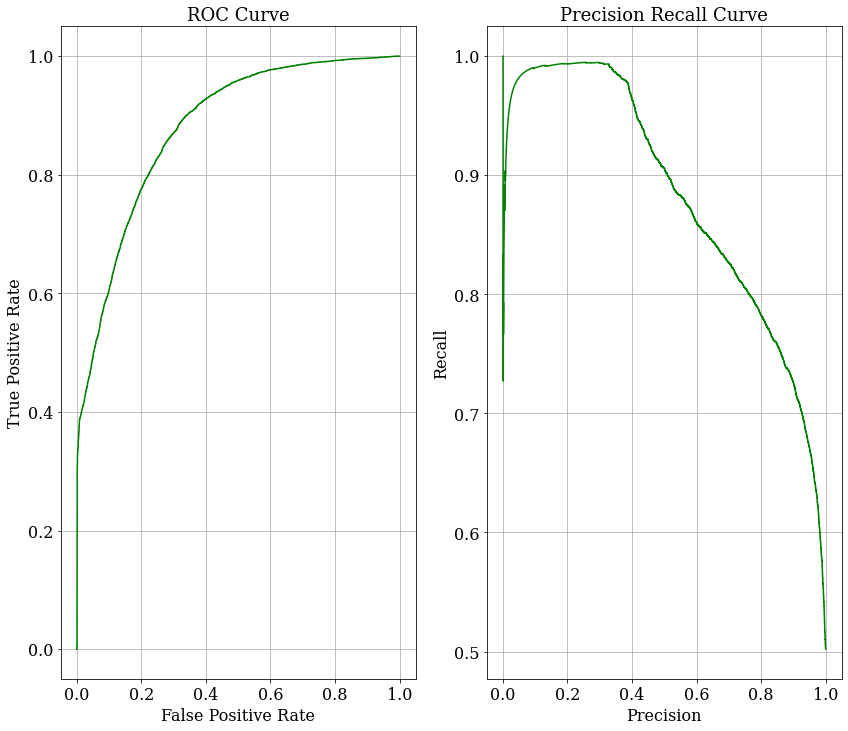

In [68]:
test_classifiers(y_val, models, models_predict_proba)

- As you train and validate each model time how long it takes to train and validate in each case and create a plot that shows both the training and prediction time for each model included in the ROC and PR curves.

- Describe: 
  - Your process of model selection and hyperparameter tuning
  - Which model performed best and your process for identifying/selecting it

**(d) Apply your model "in practice".** Make *at least* 5 submissions of different model results to the competition (more submissions are encouraged and you can submit up to 10 per day!). These do not need to be the same that you report on above, but you should select your *most competitive* models.
- Produce submissions by applying your model on the test data.
- Be sure to RETRAIN YOUR MODEL ON ALL LABELED TRAINING AND VALIDATION DATA before making your predictions on the test data for submission. This will help to maximize your performance on the test data.
- In order to get full credit on this problem you must achieve an AUC on the Kaggle public leaderboard above the "Benchmark" score on the public leaderboard.

In [81]:
X_test_ohe.fillna(0, inplace=True)

In [82]:
X_test_ohe_scaled = standard_scaler.transform(X_test_ohe)

In [83]:
X_test_ohe_pca = PCA(n_components= 500, random_state=0).fit_transform(X_test_ohe_scaled)

In [85]:
# logistic regression
lr.fit(X_train_ohe, y_train)
lr_refit_predict_proba = lr.predict_proba(X_test_ohe_scaled)[:, 1]
# knn
knn.fit(X_train_ohe, y_train)
knn_refit_predict_proba = knn.predict_proba(X_test_ohe_scaled)[:, 1]
# random forest
rf.fit(X_train_ohe, y_train)
rf_refit_predict_proba = rf.predict_proba(X_test_ohe_scaled)[:, 1]
# neural network
mlp.fit(X_train_ohe, y_train)
mlp_refit_predict_proba = mlp.predict_proba(X_test_ohe_scaled)[:, 1]

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
predict_probas = [lr_refit_predict_proba, knn_refit_predict_proba, rf_refit_predict_proba]

In [ ]:
create_submission(rf_refit_predict_proba, "/mnt/c/Users/sdona/Documents/Duke/22Spring/"
"705IDS/Assignments/05Assignment/submission.csv")

In [ ]:
create_submission(rf_refit_predict_proba, "/mnt/c/Users/sdona/Documents/Duke/22Spring/"
"705IDS/Assignments/05Assignment/submission.csv")

In [32]:
create_submission(rf_refit_predict_proba, "/mnt/c/Users/sdona/Documents/Duke/22Spring/"
"705IDS/Assignments/05Assignment/submission.csv")

# 2

## [25 points] Clustering

Clustering can be used to reveal structure between samples of data and assign group membership to similar groups of samples. This exercise will provide you with experience applying clustering algorithms and comparing these techniques on various datasets to experience the pros and cons of these approaches when the structure of the data being clustered varies. For this exercise, we'll explore clustering in two dimensions to make the results more tangible, but in practice these approaches can be applied to any number of dimensions.

**(a) Run K-means and choose the number of clusters**. Five datasets are provided for you below and the code to load them below. 
- Scatterplot each dataset
- For each dataset run the k-means algorithm for values of $k$ ranging from 1 to 10 and for each plot the "elbow curve" where you plot dissimilarity in each case. Here, you can measure dissimilarity using the within-cluster sum-of-squares, which in sklean is know as "inertia" and can be accessed through the `inertia_` attribute of a fit KMeans class instance.
- For each datasets, where is the elbow in the curve of within-cluster sum-of-squares and why? Is the elbow always clearly visible? When its not clear, you will have to use your judgement in terms of selecting a reasonable number of clusters for the data. *There are also other metrics you can use to explore to measure the quality of cluster fit (but do not have to for this assignment) including the silhouette score, the Calinski-Harabasz index, and the Davies-Bouldin, to name a few within sklearn alone. However, assessing quality of fit without "preferred" cluster assignments to compare against (that is, in a truly unsupervised manner) is challenging because measuring cluster fit quality is typically poorly-defined and doesn't generalize across all types of inter- and intra-cluster variation.*
- Plot your clustered data (different color for each cluster assignment) for your best $k$-means fit determined from both the elbow curve and your judgement for each dataset and your inspection of the dataset.

**(b) Apply DBSCAN**. Vary the `eps` and `min_samples` parameters to get as close as you can to having the same number of clusters as your choices with K-means. In this case, the black points are points that were not assigned to clusters.

**(c) Apply Spectral Clustering**. Select the same number of clusters as selected by k-means.

**(d) Comment on the strengths and weaknesses of each approach**. In particular, mention: 
- Which technique worked "best" and "worst" (as defined by matching how human intuition would cluster the data) on each dataset?
- How much effort was required to get good clustering for each method (how much parameter tuning needed to be done)?

*Note: for these clustering plots in this question, do NOT include legends indicating cluster assignment; instead just make sure the cluster assignments are clear from the plot (e.g. different colors for each cluster)*

Code is provided below for loading the datasets and for making plots with the clusters as distinct colors

In [3]:
################################
# Load the data
################################
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons

# Create / load the datasets:
n_samples = 1500
X0, _ = make_blobs(n_samples=n_samples, centers=2, n_features=2, random_state=0)
X1, _ = make_blobs(n_samples=n_samples, centers=5, n_features=2, random_state=0)

random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state, cluster_std=1.3)
transformation = [[0.6, -0.6], [-0.2, 0.8]]
X2 = np.dot(X, transformation)
X3, _ = make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], \
    random_state=random_state)
X4, _ = make_moons(n_samples=n_samples, noise=.12)

X = [X0, X1, X2, X3, X4]
# The datasets are X[i], where i ranges from 0 to 4

In [4]:
################################
# Code to plot clusters
################################
def plot_cluster(ax, data, cluster_assignments):
    '''Plot two-dimensional data clusters
    
    Parameters
    ----------
    ax : matplotlib axis
        Axis to plot on
    data : list or numpy array of size [N x 2] 
        Clustered data
    cluster_assignments : list or numpy array [N]
        Cluster assignments for each point in data

    '''
    clusters = np.unique(cluster_assignments)
    n_clusters = len(clusters)
    for ca in clusters:
        kwargs = {}
        if ca == -1:
            # if samples are not assigned to a cluster (have a cluster assignment of -1, color them gray)
            kwargs = {'color':'gray'}
            n_clusters = n_clusters - 1
        ax.scatter(data[cluster_assignments==ca, 0], data[cluster_assignments==ca, 1],s=5,alpha=0.5, **kwargs)
        ax.set_xlabel('Feature 1' , fontsize=12)
        ax.set_ylabel('Feature 2', fontsize=12)
        ax.set_title(f'Dataset X{i} No. Clusters = {n_clusters}', fontsize=14)
        ax.tick_params(labelsize=12)
        ax.axis('equal')

**(a) Run K-means and choose the number of clusters**.

**ANSWER**

Scatterplot each dataset

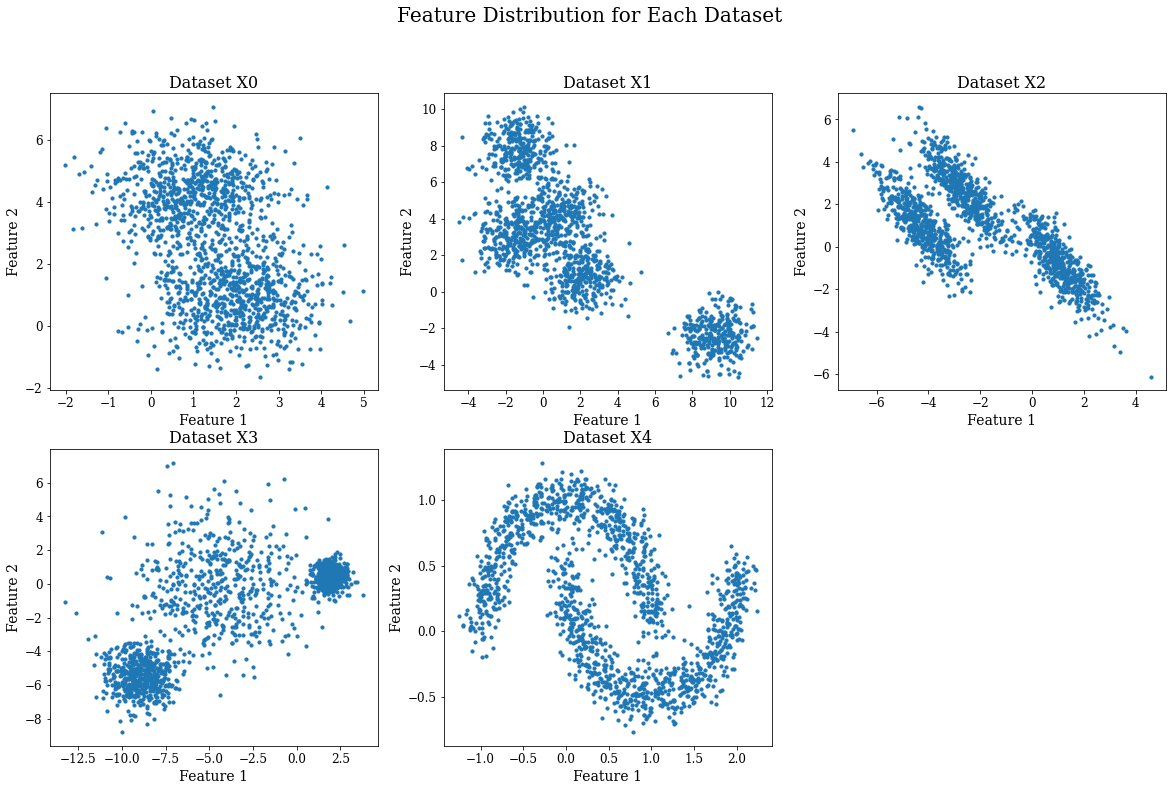

In [5]:
fig, ax = plt.subplots(2,3, figsize=(20, 12))
fig.suptitle(
    "Feature Distribution for Each Dataset", fontsize=20
)
plot_row = 0
plot_col = 0

# iterate over datasets to format and label each plot
for i, dataset in enumerate(X):
    ax[plot_row,plot_col].set_xlabel(xlabel= 'Feature 1',fontsize = 14)
    ax[plot_row,plot_col].set_ylabel(ylabel= 'Feature 2',fontsize = 14)
    ax[plot_row,plot_col].tick_params(labelsize=12)
    ax[plot_row,plot_col].scatter(dataset[:, 0], dataset[:, 1], s=10)
    ax[plot_row,plot_col].set_title(f'Dataset X{i}', fontsize = 16)

    if plot_col == 2:
        plot_col = 0
        plot_row += 1
    else:
        plot_col += 1
    
ax[1,2].set_visible(False)
plt.show()

For each dataset run the k-means algorithm for values of $k$ ranging from 1 to 10 and for each plot the "elbow curve" where you plot dissimilarity in each case. Here, you can measure dissimilarity using the within-cluster sum-of-squares, which in sklean is known as "inertia" and can be accessed through the `inertia_` attribute of a fit KMeans class instance.

In [6]:
# storing Sum of squares errors for k-means clustering on each dataset
sses1 = []
sses2 = []
sses3 = []
sses4 = []
sses5 = []
sses= [sses1,sses2,sses3,sses4,sses5]

for i in range(5):
    K = range(1,10)
    for k in K:
        kmeanModel = KMeans(n_clusters=k)
        kmeanModel.fit(X[i])
        sses[i].append(kmeanModel.inertia_)

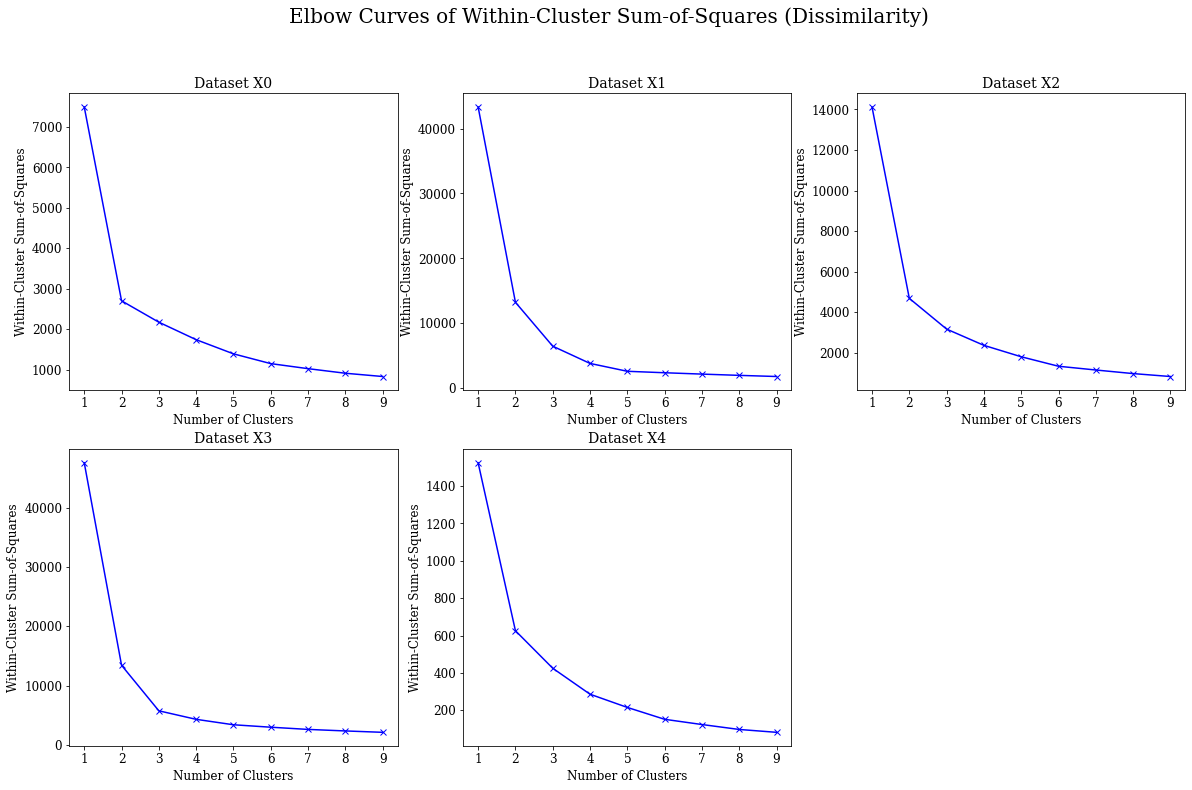

In [7]:
fig, ax = plt.subplots(2,3,figsize=(20,12))
fig.suptitle(
    "Elbow Curves of Within-Cluster Sum-of-Squares (Dissimilarity)", fontsize=20
)
plot_row = 0
plot_col = 0
for i in range(5):
    ax[plot_row, plot_col].plot(K, sses[i], 'bx-')
    ax[plot_row, plot_col].set_xlabel('Number of Clusters', fontsize=12)
    ax[plot_row, plot_col].set_ylabel('Within-Cluster Sum-of-Squares', fontsize=12)
    ax[plot_row, plot_col].tick_params(labelsize=12)
    ax[plot_row, plot_col].set_title(f'Dataset X{i}', fontsize=14)

    if plot_col == 2:
        plot_col = 0
        plot_row += 1
    else:
        plot_col += 1

ax[1,2].set_visible(False)
plt.show()

For each dataset, where is the elbow in the curve of within-cluster sum-of-squares and why? 

Is the elbow always clearly visible? 

When it's not clear, you will have to use your judgement in terms of selecting a reasonable number of clusters for the data.

- For dataset X0, the elbow occurs around 2.
- For dataset X1, the elbow is not as clear, but using my best judgement of the scatterplot above, I would choose 3 clusters.
- For dataset X2, the elbow occurs around 2.
- For dataset X3, the elbow occurs around 3.
- For dataset X4, the elbow is not as clear, but using my judgement of the scatterplot above, I would choose 2 clusters.

Plot your clustered data (different color for each cluster assignment) for your best $k$-means fit determined from both the elbow curve and your judgement for each dataset and your inspection of the dataset.

In [8]:
# storing labels for k-means clustering on each dataset
labels= []
clusters = [2,3,2,3,2]

for i in range(5):
    kmeanModel = KMeans(n_clusters=clusters[i])
    kmeanModel.fit(X[i])
    labels.append(kmeanModel.labels_)

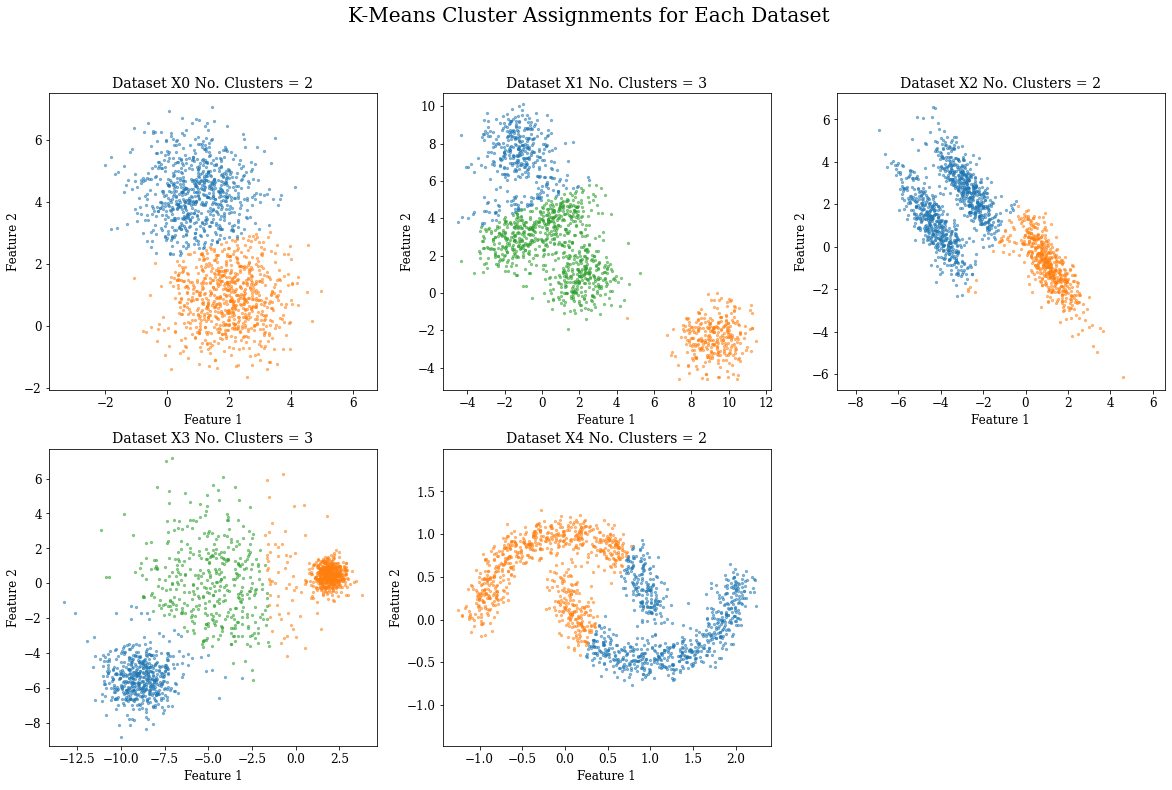

In [9]:
fig, ax = plt.subplots(2,3,figsize=(20,12))
fig.suptitle("K-Means Cluster Assignments for Each Dataset", fontsize=20)

plot_row = 0
plot_col = 0
for i in range(5):
    plot_cluster(ax[plot_row,plot_col], X[i], labels[i])
    if plot_col == 2:
        plot_col = 0
        plot_row += 1
    else:
        plot_col += 1

ax[1,2].set_visible(False)
plt.show()

**(b) Apply DBSCAN**. Vary the `eps` and `min_samples` parameters to get as close as you can to having the same number of clusters as your choices with K-means. In this case, the black points are points that were not assigned to clusters.

**ANSWER**

In [10]:
max_dist = [0.57, 2, 0.47, 0.9, 0.13]
min_pts = [60, 70, 15, 11, 15]
labels = []

for i in range(5):
    labels.append(DBSCAN(eps= max_dist[i], min_samples=min_pts[i]).fit_predict(X[i]))

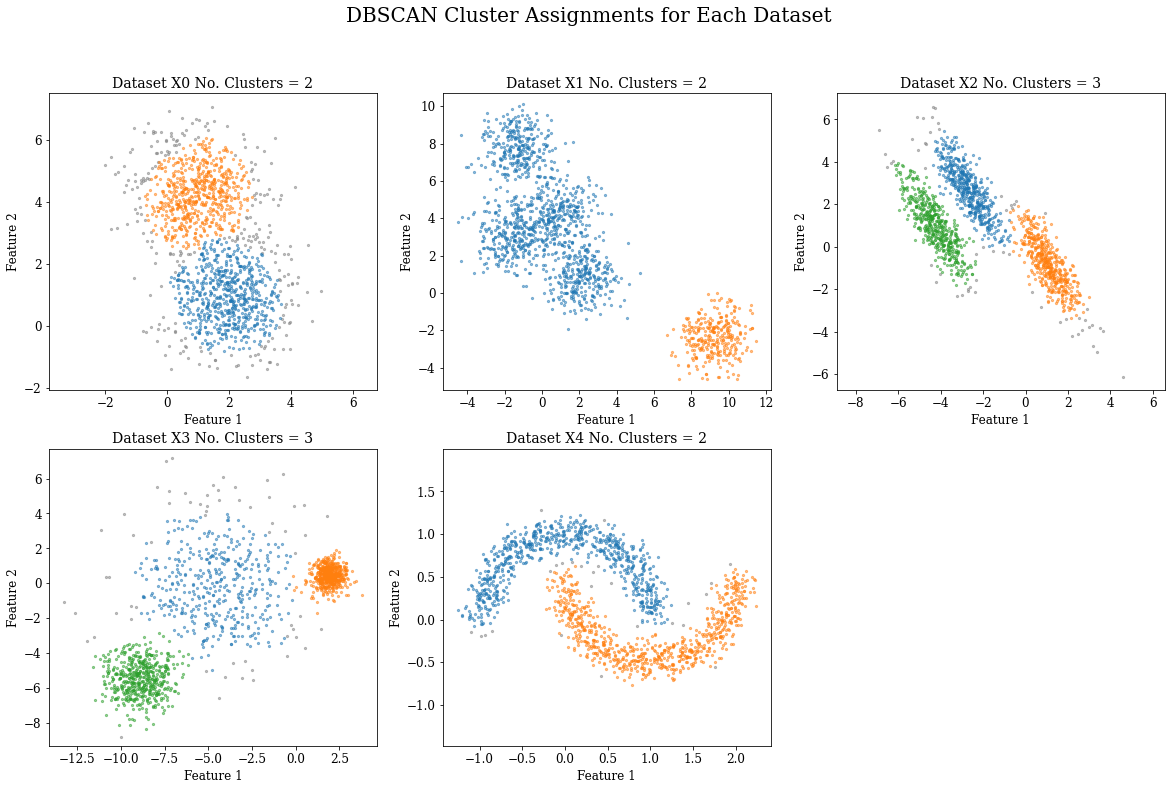

In [12]:
fig, ax = plt.subplots(2,3,figsize=(20,12))
fig.suptitle("DBSCAN Cluster Assignments for Each Dataset", fontsize=20)


plot_row = 0
plot_col = 0
for i in range(5):
    plot_cluster(ax[plot_row,plot_col], X[i], labels[i])
    if plot_col == 2:
        plot_col = 0
        plot_row += 1
    else:
        plot_col += 1

ax[1,2].set_visible(False)
plt.show()

**(c) Apply Spectral Clustering**. Select the same number of clusters as selected by k-means.

**ANSWER**

In [13]:
# storing labels for spectral clustering on each dataset
labels= []
clusters = [2,4,3,3,2]

for i in range(5):
    spectralModel = SpectralClustering(n_clusters=clusters[i])
    spectralModel.fit(X[i])
    labels.append(spectralModel.labels_)

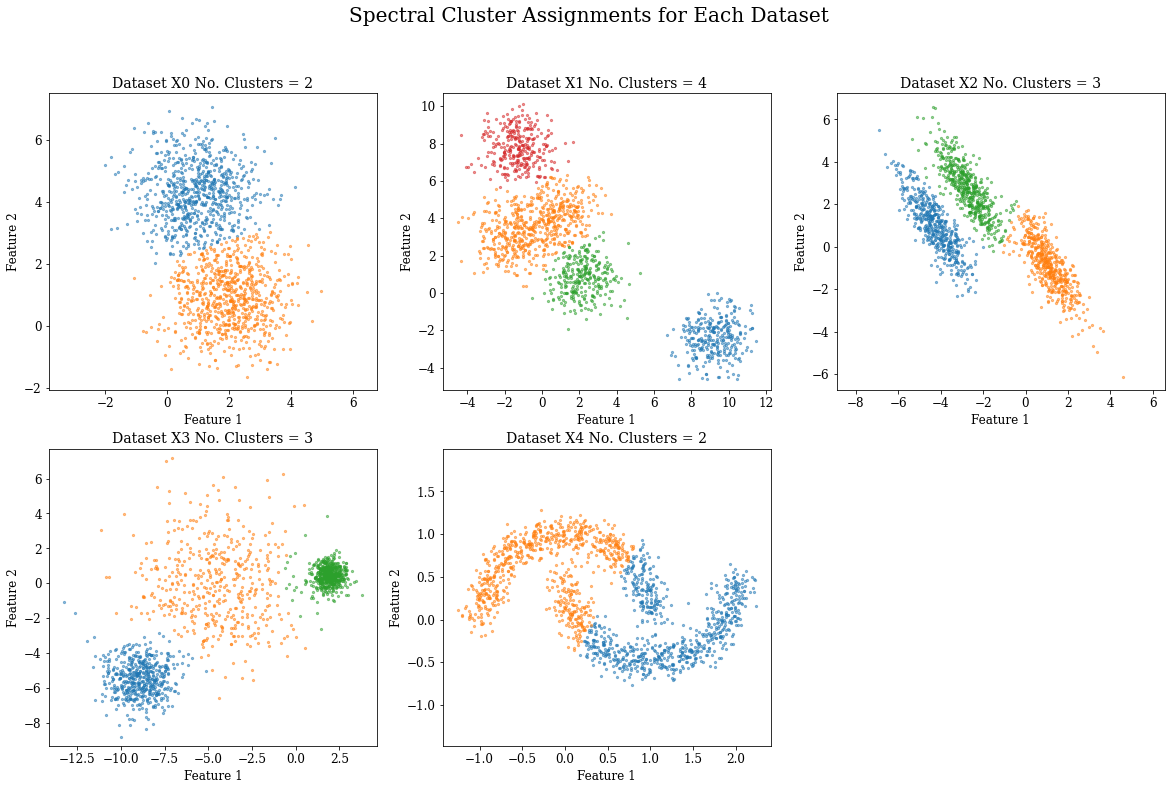

In [14]:
fig, ax = plt.subplots(2,3,figsize=(20,12))
fig.suptitle("Spectral Cluster Assignments for Each Dataset", fontsize=20)


plot_row = 0
plot_col = 0
for i in range(5):
    plot_cluster(ax[plot_row,plot_col], X[i], labels[i])
    if plot_col == 2:
        plot_col = 0
        plot_row += 1
    else:
        plot_col += 1

ax[1,2].set_visible(False)
plt.show()

**(d) Comment on the strengths and weaknesses of each approach**. In particular, mention: 
- Which technique worked "best" and "worst" (as defined by matching how human intuition would cluster the data) on each dataset?
- How much effort was required to get good clustering for each method (how much parameter tuning needed to be done)?

**ANSWER**

K-Means
- Minimal effort required

DBSCAN
- Maximum effort required

Spectral
- Minimal effort required

# 3

## [25 points] Dimensionality reduction and visualization of digits with PCA and t-SNE

**(a)** Reduce the dimensionality of the data with PCA for data visualization. Load the `scikit-learn` digits dataset (code provided to do this below). Apply PCA and reduce the data (with the associated cluster labels 0-9) into a 2-dimensional space. Plot the data with labels in this two dimensional space (labels can be colors, shapes, or using the actual numbers to represent the data - definitely include a legend in your plot).

**(b)** Create a plot showing the cumulative fraction of variance explained as you incorporate from $1$ through all $D$ principal components of the data (where $D$ is the dimensionality of the data). 
- What fraction of variance in the data is UNEXPLAINED by the first two principal components of the data? 
- Briefly comment on how this may impact how well-clustered the data are. 
*You can use the `explained_variance_` attribute of the PCA module in `scikit-learn` to assist with this question*

**(c)** Reduce the dimensionality of the data with t-SNE for data visualization. T-distributed stochastic neighborhood embedding (t-SNE) is a nonlinear dimensionality reduction technique that is particularly adept at embedding the data into lower 2 or 3 dimensional spaces. Apply t-SNE using the `scikit-learn` implementation to the digits dataset and plot it in 2-dimensions (with associated cluster labels 0-9). You may need to adjust the parameters to get acceptable performance. You can read more about how to use t-SNE effectively [here](https://distill.pub/2016/misread-tsne/).

**(d)** Briefy compare/contrast the performance of these two techniques. 
- Which seemed to cluster the data best and why?
- Notice that t-SNE doesn't have a `fit` method, but only a `fit_transform` method. Why is this? What implications does this imply for using this method?
*Note: Remember that you typically will not have labels available in most problems.*

Code is provided for loading the data below.

In [34]:
################################
# Load the data
################################

# load dataset
digits = datasets.load_digits()
n_sample = digits.target.shape[0]
n_feature = digits.images.shape[1] * digits.images.shape[2]
X_digits = np.zeros((n_sample, n_feature))
for i in range(n_sample):
    X_digits[i, :] = digits.images[i, :, :].flatten()
y_digits = digits.target

**(a)** Reduce the dimensionality of the data with PCA for data visualization. Load the `scikit-learn` digits dataset (code provided to do this below). Apply PCA and reduce the data (with the associated cluster labels 0-9) into a 2-dimensional space. Plot the data with labels in this two dimensional space (labels can be colors, shapes, or using the actual numbers to represent the data - definitely include a legend in your plot).

**ANSWER**

In [35]:
standard_scaler = StandardScaler()
X_digits_new = standard_scaler.fit_transform(X_digits)

In [36]:
X_digits_pca = PCA(n_components= 2, random_state=0).fit_transform(
    X_digits_new, y_digits)

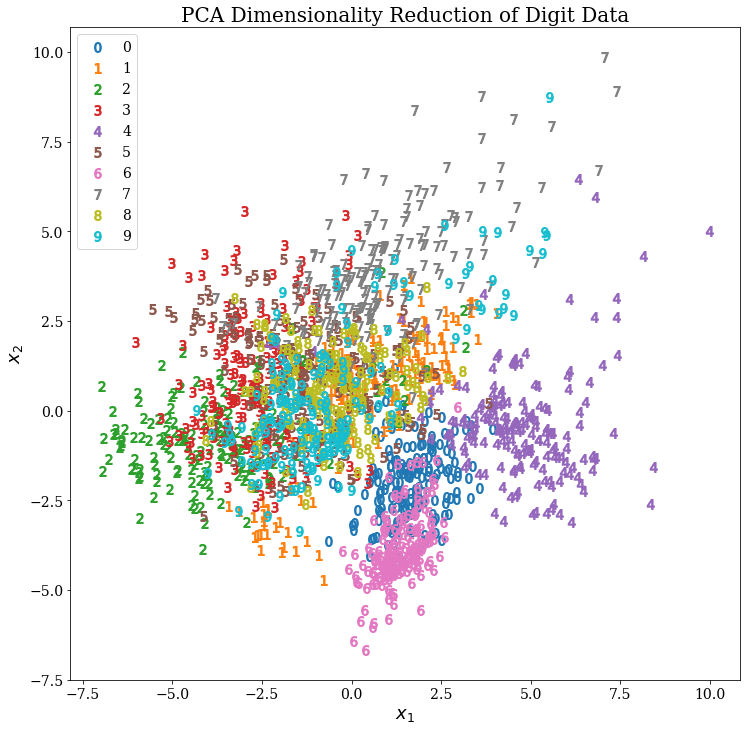

In [66]:
# function to plot labeled data
def plot_data(ax, X, y, title):
    labels = np.unique(y)
    for i in labels:
        ax.scatter(X[y == i, 0], X[y == i, 1], label=i, marker= '$' + str(i) + \
             '$', s=100)
    ax.set_title(title, fontsize=20)
    ax.set_xlabel("$x_1$", fontsize=18)
    ax.set_ylabel("$x_2$", fontsize=18)
    ax.legend(loc="best", fontsize=14)
    ax.tick_params(labelsize=14)

fig, ax = plt.subplots(figsize=(12,12))
plot_data(ax, X_digits_pca, y_digits, "PCA Dimensionality Reduction of Digit Data")

**(b)** Create a plot showing the cumulative fraction of variance explained as you incorporate from $1$ through all $D$ principal components of the data (where $D$ is the dimensionality of the data). 

**ANSWER**

In [48]:
pca = PCA().fit(X_digits_new, y_digits)
components = np.cumsum(pca.explained_variance_ratio_)

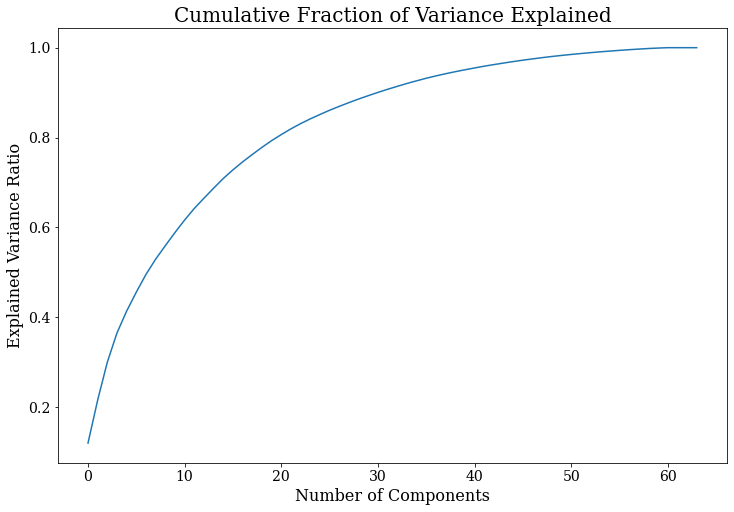

In [54]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(components)
plt.xlabel('Number of Components', fontsize=16)
plt.ylabel('Explained Variance', fontsize=16)
plt.title('Cumulative Fraction/Ratio of Variance Explained', fontsize=20)
plt.tick_params(labelsize=14)
plt.show()

What fraction of variance in the data is UNEXPLAINED by the first two principal components of the data? 

In [77]:
unexp_var = 1-components[:2]
pc_1 = unexp_var[0]*100
pc_2 = unexp_var[1]*100

print("The fraction of variance that is *not* explained by the first two components"
" is {:.1f}% and {:.1f}%".format(pc_1, pc_2))

The fraction of variance that is *not* explained by the first two components is 88.0% and 78.4%


Briefly comment on how this may impact how well-clustered the data are.

**(c)** Reduce the dimensionality of the data with t-SNE for data visualization. T-distributed stochastic neighborhood embedding (t-SNE) is a nonlinear dimensionality reduction technique that is particularly adept at embedding the data into lower 2 or 3 dimensional spaces. Apply t-SNE using the `scikit-learn` implementation to the digits dataset and plot it in 2-dimensions (with associated cluster labels 0-9). You may need to adjust the parameters to get acceptable performance. You can read more about how to use t-SNE effectively [here](https://distill.pub/2016/misread-tsne/).

**ANSWER**

In [43]:
X_digits_tsne = TSNE(n_components=2, random_state=0).fit_transform(X_digits_new)

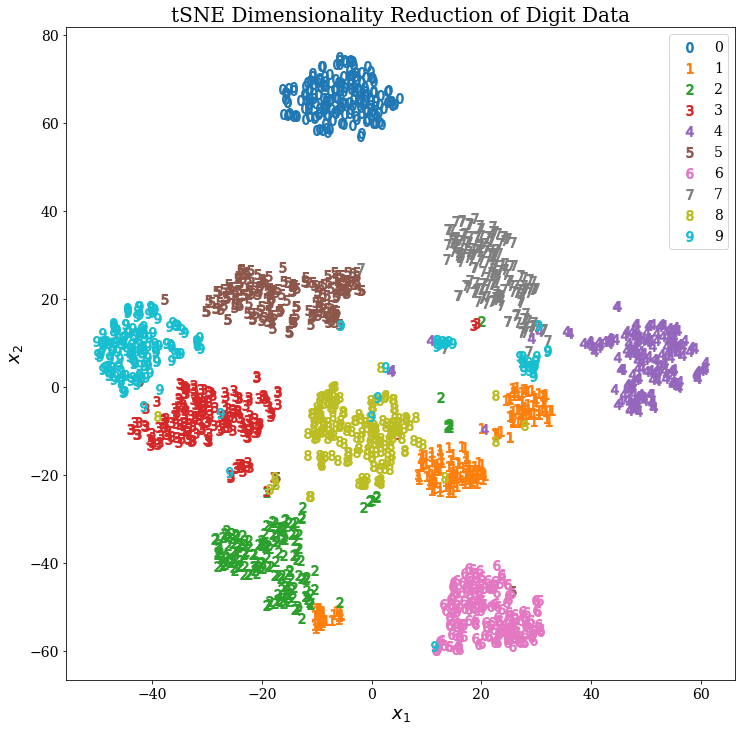

In [46]:
fig, ax = plt.subplots(figsize=(12,12))
plot_data(ax, X_digits_tsne, y_digits, "tSNE Dimensionality Reduction of Digit Data")

**(d)** Briefy compare/contrast the performance of these two techniques. 
- Which seemed to cluster the data best and why?
- Notice that t-SNE doesn't have a `transform` method, but only a `fit_transform` method. Why is this? What implications does this imply for using this method?
*Note: Remember that you typically will not have labels available in most problems.*

**ANSWER**

fit calculates transformation matrix based on training data

transform is applied to the test data, ONLY AFTER IT HAS BEEN FITTED

fit_transform does this at the same time